In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X = pd.read_excel('SSDB_Raw_Data.xlsx', 'INCIDENT')
X

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20200727AZCAO,https://www.kgun9.com/news/education/man-dies-...,3,Local,4,2020-07-27,Summer,Canyon del Oro High School,Oro Valley,AZ,...,No,No,No,No,No,No,No,No,NaN,No
1,20200721SCBRO,https://abcnews4.com/news/crime-news/person-of...,2,Local,3,2020-07-21,Summer,Brookdale Elementary School,Orangeburg,SC,...,No,No,No,No,No,No,NaN,No,NaN,No
2,20200714MIWID,https://www.detroitnews.com/story/news/local/m...,1,Local,3,2020-07-14,Summer,Willow Woods Elementary School,Detroit,MI,...,No,No,No,No,No,No,No,No,NaN,No
3,20200704INLAM,https://www.abc57.com/news/murder-suspect-char...,2,Local,4,2020-07-04,Summer,Lake Hills Elementary School,Michigan City,IN,...,No,No,No,No,No,No,No,No,NaN,No
4,20200701ILFRP,https://www.dailyherald.com/news/20200714/pros...,1,Local,3,2020-07-01,Summer,Frost Elementary School,Prospect Heights,IL,...,Yes,No,No,No,No,No,Yes,No,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,20220605INWEG,https://abc7chicago.com/gary-indiana-shooting-...,2,Local,4,2022-06-05,Summer,West Side Leadership Academy,Gary,IN,...,NaN,No,No,No,No,No,NaN,No,99,No
2063,20220607MIPED,https://www.wxyz.com/news/shots-fired-at-persh...,4,Local,4,2022-06-07,Summer,Pershing High School,Detroit,MI,...,NaN,No,No,No,No,No,NaN,No,99,No
2064,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No
2065,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


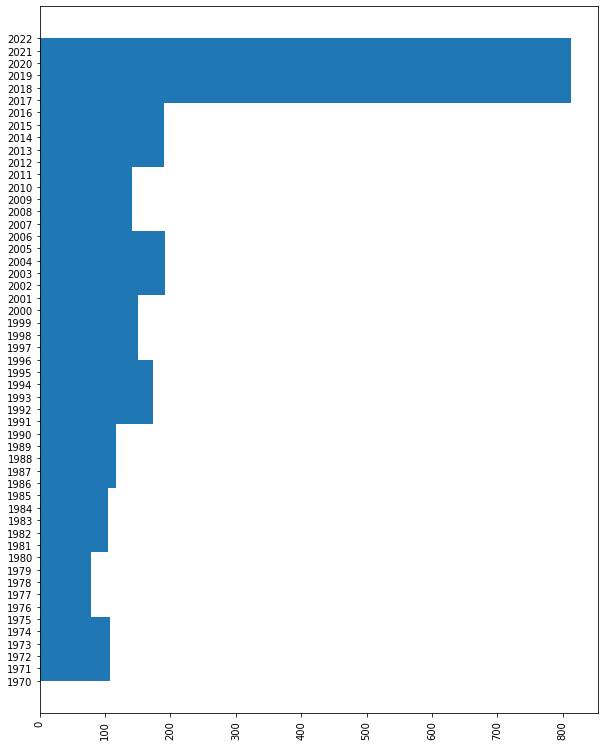

In [6]:
plt.figure(figsize=(10,13))
plt.hist(X['Date'].apply(lambda d: d[:4]).sort_values(), orientation='horizontal')
plt.xticks(rotation=90)
plt.show()

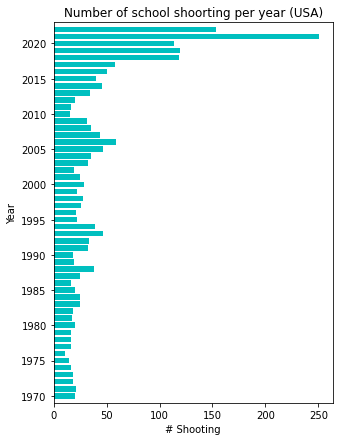

In [98]:
dates = X['Date'].apply(lambda d: int(d[:4]))
dates_count = dates.value_counts()
dates_count.sort_index(inplace=True)

plt.figure(figsize=(5,7))
plt.title('Number of school shoorting per year (USA)')
plt.barh(dates_count.index, dates_count.values,align='center', color='c')
plt.xlabel('# Shooting')
plt.ylabel('Year')
plt.yticks(range(1970,2022+1,5))
plt.ylim((1970-1, 2022+1))
plt.show()

In [101]:
dates_count

1970     20
1971     21
1972     18
1973     18
1974     16
1975     14
1976     11
1977     16
1978     16
1979     16
1980     20
1981     17
1982     18
1983     25
1984     25
1985     20
1986     16
1987     25
1988     38
1989     19
1990     18
1991     32
1992     33
1993     47
1994     39
1995     22
1996     21
1997     26
1998     28
1999     22
2000     29
2001     25
2002     19
2003     32
2004     35
2005     47
2006     59
2007     44
2008     35
2009     31
2010     15
2011     16
2012     20
2013     34
2014     46
2015     40
2016     50
2017     58
2018    118
2019    119
2020    114
2021    251
2022    153
Name: Date, dtype: int64

In [105]:
len(X)

2067

In [103]:
1/5 * (118+119+114+251+153)

151.0

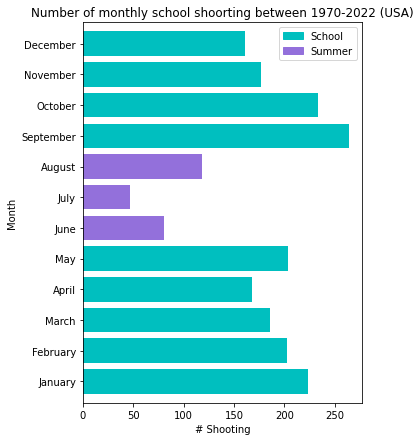

In [97]:
import matplotlib.patches as mpatches

months = X['Date'].apply(lambda d: int(d[5:7]))
months_count = months.value_counts()
months_count.sort_index(inplace=True, ascending=True)

plt.figure(figsize=(5,7))
plt.title('Number of monthly school shoorting between 1970-2022 (USA)')
plt.barh(months_count.index, months_count.values,align='center', color=["c", "c", "c", "c", "c", "mediumpurple", "mediumpurple", "mediumpurple", "c", "c", "c", "c"])
plt.xlabel('# Shooting')
plt.ylabel('Month')
plt.yticks(range(1,13), ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.ylim((1-0.7, 12+0.7))

p1 = mpatches.Patch(color='c', label='School')
p2 = mpatches.Patch(color='mediumpurple', label='Summer')
plt.legend(handles=[p1,p2])

plt.show()

In [86]:
num_news = X['Number_News'].replace({
    '1': '1-5', '2': '1-5', '3': '1-5', '4': '1-5', '5': '1-5',
    '6': '5-10', '10': '5-10', 
    '11': '11-100', '20': '11-100', '50': '11-100', '99': '11-100', '100': '11-100',
    '999': '100+', '500': '100+'
}).dropna().value_counts()
num_news

1-5       471
5-10      126
11-100     86
100+        9
Name: Number_News, dtype: int64

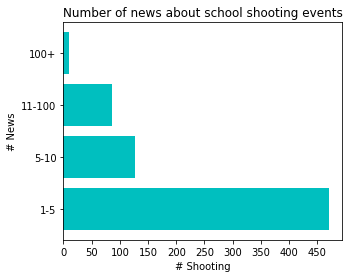

In [100]:
plt.figure(figsize=(5,4))
plt.title('Number of news about school shooting events')
plt.barh(num_news.index, num_news.values, align='center', color='c')
plt.xlabel('# Shooting')
plt.ylabel('# News')
plt.xticks(range(0,500, 50))
plt.show()